In [33]:
# Dependencies
import os, sys
import numpy as np
from pprint import pprint
from sewar.full_ref import ssim, msssim, mse
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

# Local
from nantex.utils import PyDialogue as pyD

from typing import List, Tuple, Dict

In [37]:
# Grab Data
npy_data:Dict = {path.split('/')[-1]:np.load(path) for path in pyD.askFILES() if path.endswith('.npy')}

# Touring
touring:np.ndarray = imread(pyD.askFILE(), as_gray=True)

# Void
void = np.zeros((512,512))

In [38]:
# reshape
touring_re = touring[25:537,:512]
touring_re.shape

for key, img in npy_data.items():
    img_re = img[img.shape[0]//2-256:img.shape[0]//2+256, img.shape[1]//2-256:img.shape[1]//2+256]
    npy_data[key] = img_re

In [ ]:
# append
eval_dict:Dict
eval_dict = {key:img for key,img in npy_data.items()}
eval_dict['touring'] = touring_re
eval_dict['void'] = void

# cast to same dtype
for key,img in eval_dict.items():
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = img * 255
    img = img.astype(np.uint8)
    eval_dict[key] = img
    
# eval
gt = eval_dict['MIC_5_cut.npy']
eval_values = {key:{'ssim':ssim(GT = gt, P = img)[0], 'msssim':np.real(msssim(GT = gt, P = img)), 'mse':mse(GT = gt, P = img)} for key,img in eval_dict.items()}

In [47]:
pprint(eval_values)

{'CLA_2_cut.npy': {'mse': 2845.8469734191895,
                   'msssim': 0.13956498297683934,
                   'ssim': 0.08523981816537556},
 'MIC_5_cut.npy': {'mse': 0.0, 'msssim': 1.0, 'ssim': 1.0},
 'MIC_6_cut.npy': {'mse': 2598.25252532959,
                   'msssim': 0.1793197648323432,
                   'ssim': 0.1913422417715859},
 'touring': {'mse': 30164.009117126465,
             'msssim': 0.07294883906846097,
             'ssim': 0.01779130264848035},
 'void': {'mse': 1954.6563529968262,
          'msssim': 0.1798887035004489,
          'ssim': 0.3247473028832142}}


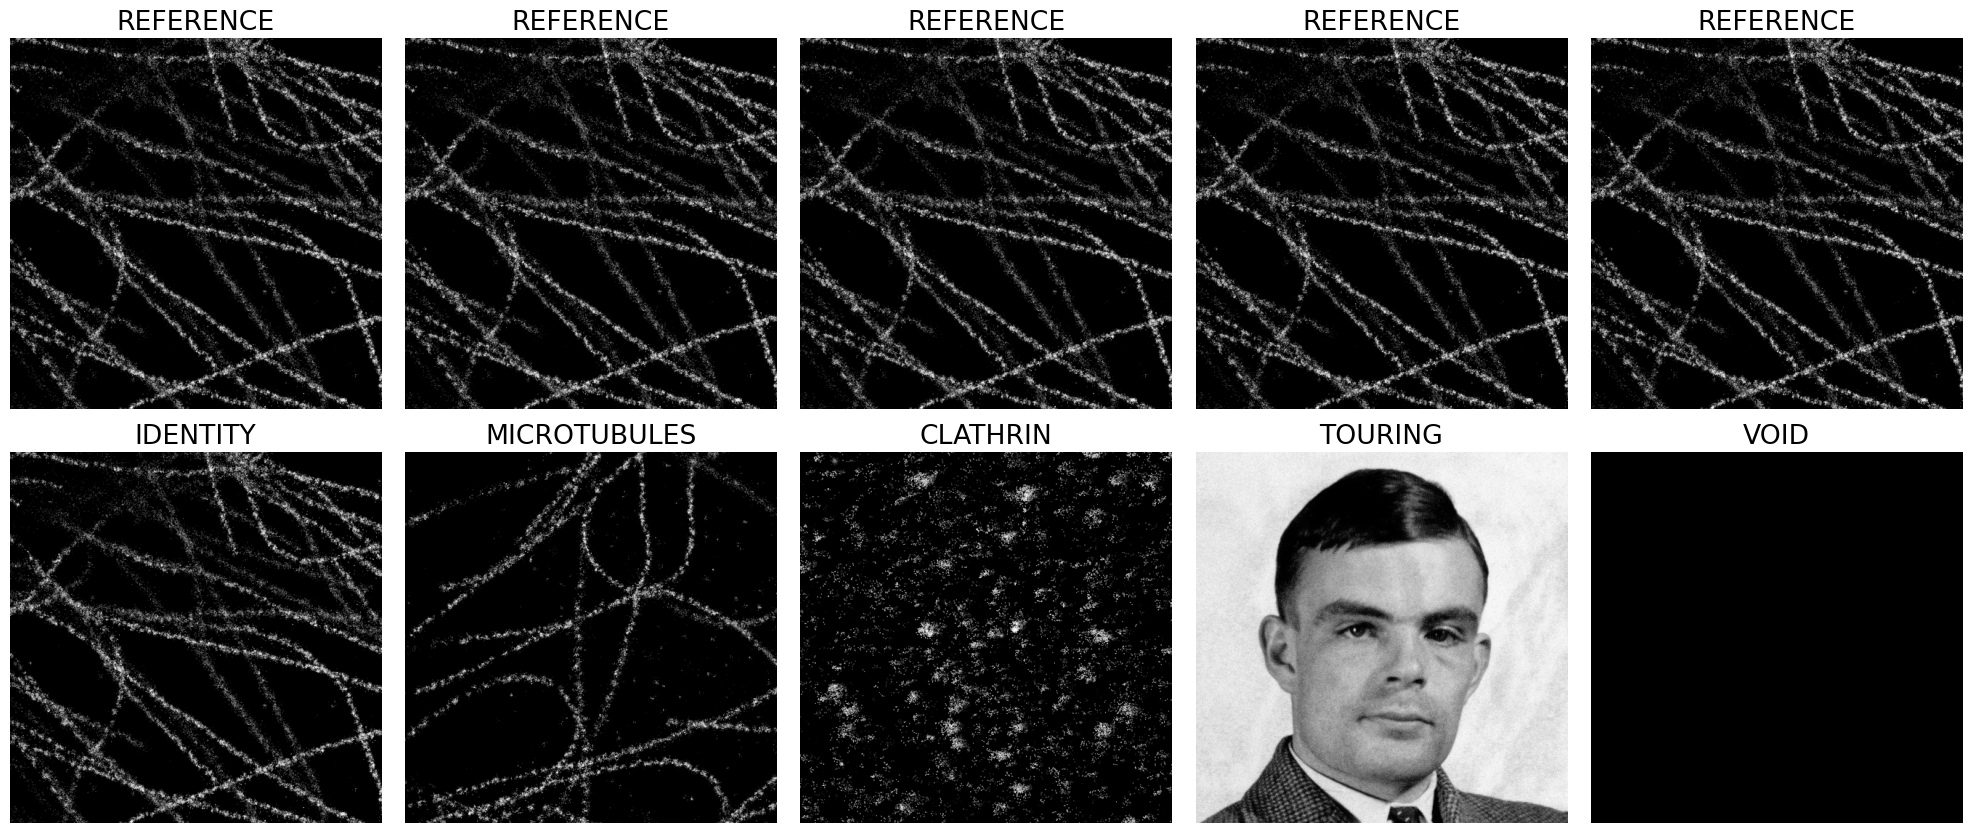

In [48]:
# stylesheet
from nantex.utils import PltStyler
PltStyler().enforece_stylesheet()

# figure
fig, axs = plt.subplots(2, 5, figsize=(20,10), dpi = 100)
plt.subplots_adjust(wspace=-0.1, hspace=-0.5)

# Baseline
for i in range(5):
    axs[0,i].set_title('REFERENCE')
    axs[0,i].imshow(eval_dict['MIC_5_cut.npy'], cmap = 'gray')

# Identity
axs[1,0].set_title('IDENTITY')
axs[1,0].imshow(eval_dict['MIC_5_cut.npy'], cmap = 'gray')

# Microtubules
axs[1,1].set_title('MICROTUBULES')
axs[1,1].imshow(eval_dict['MIC_6_cut.npy'], cmap = 'gray')

# Clathrin
axs[1,2].set_title('CLATHRIN')
axs[1,2].imshow(eval_dict['CLA_2_cut.npy'], cmap = 'gray')

# Touring
axs[1,3].set_title('TOURING')
axs[1,3].imshow(eval_dict['touring'], cmap = 'gray') 

# Void
axs[1,4].set_title('VOID')
axs[1,4].imshow(eval_dict['void'], cmap = 'gray')

# Layout
for ax in axs.flatten():
    ax.axis('off')

fig.tight_layout()
fig.savefig('negative_example_render.svg', format='svg', dpi = 300, transparent = True)

In [ ]:
## panel save
for key, img in eval_dict.items():
    imsave(f'{key}.png', img, cmap = 'gray', format = 'png')